In [1]:
#!/usr/bin/python3.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
# import tensorflow as tf
from sklearn.model_selection import train_test_split


%matplotlib notebook

In [2]:
# ================= CONSTANTS =================
PMT_PULSE_LENGTH = 1500  # Sample lenght of a typical pulse
SAMPLES_BEFORE_PEAK = 4  # Samples to store before peak detection. MUST BE SMALLER THAN 8

In [3]:
df=pd.read_csv("../data_Co60/20210713_185100/20210713_185100_0.csv", index_col=0)

In [4]:
df

TBP:68982  TBP:69034  TBP:68709  TBP:88222  TBP:65704  TBP:65964  \
0            138        137        136        137        136        137   
1            136        136        136        137        136        136   
2            137        136        137        137        137        137   
3            136        136        136        136        136        136   
4            137        137        137        137        137        136   
...          ...        ...        ...        ...        ...        ...   
65529        137        136        136        136        136        136   
65530        137        137        137        137        137        137   
65531        136        136        136        136        136        136   
65532        137        137        137        137        136        136   
65533        137        136        136        135        136        136   

       TBP:65582  TBP:67104  TBP:80184  TBP:84502  ...  TBP:66419  TBP:71609  \
0            135        137        137        137  ...        137        137   
1            136        136        136        136  ...        136        136   
2            137        137        137        137  ...        137        137   
3            136        136        136        136  ...        136        136   
4            135        137        137        136  ...        137        137   
...          ...        ...        ...        ...  ...        ...        ...   
65529        136        137        136        137  ...        136        136   
65530        137        137        137        137  ...        136        137   
65531        136        136        136        136  ...        136        136   
65532        137        137        136        136  ...        137        136   
65533        137        136        136        136  ...        137        137   

       TBP:92483  TBP:70339  TBP:68329  TBP:71975  TBP:75146  TBP:73617  \
0            137        137        137        137        130        137   
1            136        136        136        136        132        136   
2            136        137        137        137        134        137   
3            136        136        136        136        135        136   
4            137        137        136        137        135        136   
...          ...        ...        ...        ...        ...        ...   
65529        134        137        136        136        136        136   
65530        134        137        137        136        137        136   
65531        133        136        136        136        136        136   
65532        137        137        136        137        137        137   
65533        136        136        136        136        136        136   

       TBP:69388  TBP:76800  
0            137        137  
1            137        136  
2            138        136  
3            136        136  
4            137        137  
...          ...        ...  
65529        137        136  
65530        137        137  
65531        136        136  
65532        137        136  
65533        136        136  

[65534 rows x 4235 columns]

In [6]:
df2=df.iloc[:PMT_PULSE_LENGTH].copy()
df2=(df2-np.mean(df2))/np.std(df2)
df2

TBP:68982  TBP:69034  TBP:68709  TBP:88222  TBP:65704  TBP:65964  \
0      0.998509   0.874499   0.647385   0.841598   0.527805   0.838558   
1      0.626717   0.639250   0.647385   0.841598   0.527805   0.658636   
2      0.812613   0.639250   0.850454   0.841598   0.705039   0.838558   
3      0.626717   0.639250   0.647385   0.627051   0.527805   0.658636   
4      0.812613   0.874499   0.850454   0.841598   0.705039   0.658636   
...         ...        ...        ...        ...        ...        ...   
1495   0.440821  -3.124734   0.647385   0.841598  -0.181134   0.658636   
1496   0.626717  -2.183738   0.647385   0.841598  -0.003899   0.838558   
1497   0.626717  -1.948489   0.647385   0.627051  -0.003899   0.478713   
1498   0.812613  -1.713240   0.850454   0.841598  -0.358368   0.838558   
1499   0.812613  -2.418987   0.647385   0.412503  -0.712838   0.658636   

      TBP:65582  TBP:67104  TBP:80184  TBP:84502  ...  TBP:66419  TBP:71609  \
0     -0.523242   0.796612   0.871095   0.771673  ...   0.812821   0.707616   
1      0.131356   0.582929   0.693875   0.504412  ...   0.139956  -0.140844   
2      0.785954   0.796612   0.871095   0.771673  ...   0.812821   0.707616   
3      0.131356   0.582929   0.693875   0.504412  ...   0.139956  -0.140844   
4     -0.523242   0.796612   0.871095   0.504412  ...   0.812821   0.707616   
...         ...        ...        ...        ...  ...        ...        ...   
1495   0.131356   0.582929   0.693875   0.504412  ...   0.139956  -0.140844   
1496   0.131356   0.582929   0.871095   0.771673  ...   0.812821   0.707616   
1497   0.131356   0.155562   0.693875   0.504412  ...   0.139956  -0.140844   
1498   0.785954   0.369245   0.871095   0.771673  ...   0.812821   0.707616   
1499   0.131356   0.155562   0.871095   0.504412  ...   0.139956  -0.140844   

      TBP:92483  TBP:70339  TBP:68329  TBP:71975  TBP:75146  TBP:73617  \
0      0.800947   0.756500   0.842385   0.829319  -4.108141   0.861834   
1      0.619134   0.516949   0.655022   0.724298  -2.685326   0.660878   
2      0.619134   0.756500   0.842385   0.829319  -1.262511   0.861834   
3      0.619134   0.516949   0.655022   0.724298  -0.551104   0.660878   
4      0.800947   0.756500   0.655022   0.829319  -0.551104   0.660878   
...         ...        ...        ...        ...        ...        ...   
1495   0.619134   0.516949   0.280295   0.724298   0.160304   0.861834   
1496   0.800947   0.516949  -0.094431   0.829319   0.871711   0.861834   
1497   0.255508   0.516949   0.092932   0.724298   0.160304   0.660878   
1498  -0.471744   0.756500   0.280295   0.829319   0.871711   0.861834   
1499  -0.835370   0.516949   0.280295   0.724298   0.871711   0.660878   

      TBP:69388  TBP:76800  
0      0.842357   0.699753  
1      0.842357   0.541485  
2      1.063216   0.541485  
3      0.621497   0.541485  
4      0.842357   0.699753  
...         ...        ...  
1495   0.621497   0.541485  
1496   0.842357   0.699753  
1497   0.621497   0.541485  
1498   0.842357   0.699753  
1499   0.621497   0.541485  

[1500 rows x 4235 columns]

<IPython.core.display.Javascript object>


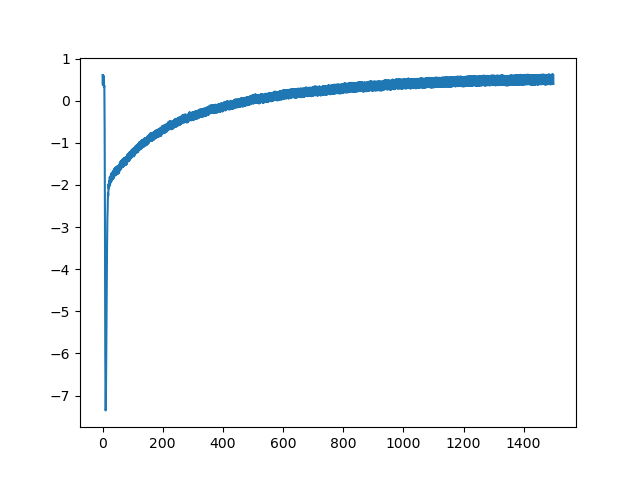

In [7]:
%matplotlib notebook
mod=np.mean(df2.T)
plt.plot(mod)

# FIR Integrated

In [9]:
def pkdetect(x, thr=100, pkh=10):
    peak=[]
    lmax=0
    imax=0
    count=0
    for i in range(1,len(x)):
        if x[i] <= thr:
            pass
        elif x[i] > lmax:
            imax=i
            lmax=x[i]
        elif ((lmax-x[i-1]) > pkh) and (x[i]-x[i-1])>0:
            peak.append(imax)
            lmax=0
        else:
            pass
            
    return peak

In [ ]:
thr=1000
pkh=100000
%matplotlib notebook      
pkamp=[]
for c in df.columns[:]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    intg=np.convolve(fir,np.full(1000,1))
    peak=pkdetect(intg, thr, pkh)
    pkamp=np.append(pkamp,intg[peak])
plt.plot(intg)
plt.plot(peak,intg[peak],".")
plt.show()
# sns.histplot(data=pkamp, kde=True)

In [ ]:
%matplotlib notebook
# sns.histplot(data=pkamp, kde=True)
plt.hist(pkamp)
plt.show()

In [ ]:
df2=pd.DataFrame(pkamp, columns=["Co60"])
df2.to_csv("../FIR_Integrated_Co60_mod3.csv")
df2

# Only FIR

<IPython.core.display.Javascript object>


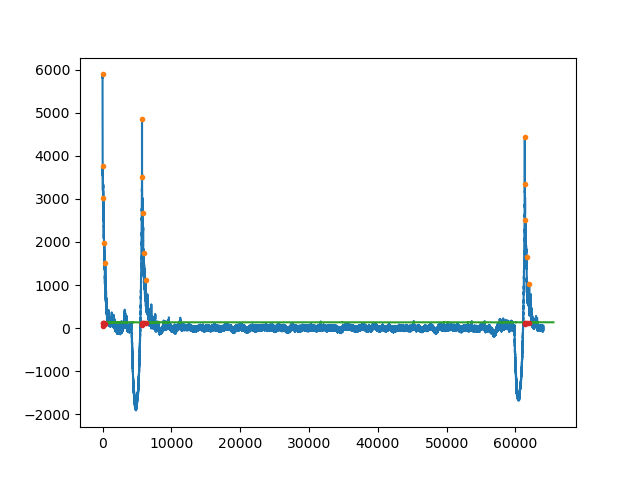

In [10]:
thr=100
pkh=1000
%matplotlib notebook      
pkamp=[]
# for c in df.columns[:10]:
for c in df.columns[:]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    peak=pkdetect(fir, thr, pkh)
    pkamp=np.append(pkamp,fir[peak])
plt.plot(fir)
plt.plot(peak,fir[peak],".")
plt.plot(x[10:])
plt.plot(peak, x[10:][peak], ".")
# sns.histplot(data=pkamp, kde=True)

In [ ]:
df2=pd.DataFrame(pkamp, columns=["Co60"])
df2.to_csv("../FIR_Co60_mod3.csv")
df2

In [ ]:
%matplotlib notebook
sns.histplot(data=pkamp, kde=True)
plt.show()

In [ ]:
%matplotlib notebook
data=max(x)-x
# plt.plot(data)
xpeak=pkdetect(data,10, 10)
plt.plot(x)
plt.plot(xpeak, x[xpeak],".")
plt.show()

In [ ]:
xpeak

In [11]:
#Isolating individual pulses within a trace

def isolatePulses(singleTrace, peakIndexesList, pulseLength, samplesBeforePeak):
    singleTrace = singleTrace.tolist()
    i = 0 #Input pulse index
    outputPulseIndex = 0
    diffFromLastPeak = pulseLength #In order to classify the first pulse as a valid event
    isolatedPulses = [] #Output variable (list of pulse samples) that stores each valid pulse
    
    #Be sure to slide along the whole trace, avoiding short pulses located at the end
    while ((i < len(peakIndexesList)) and (peakIndexesList[i] <= len(singleTrace) - pulseLength)):
        #print("Diff from last peak: " + str(diffFromLastPeak))
        if(diffFromLastPeak >= pulseLength):
            lowerPulseRange = peakIndexesList[i] - samplesBeforePeak #Be sure to record some samples before peak
            upperPulseRange = lowerPulseRange + pulseLength #Store the whole pulse
            isolatedPulses.append([])
            isolatedPulses[outputPulseIndex].extend(singleTrace[lowerPulseRange:upperPulseRange])
            #print("OutputPulseIndex: " + str(outputPulseIndex))
            outputPulseIndex += 1
            diffFromLastPeak = 0
        i += 1
        if i < len(peakIndexesList):
            diffFromLastPeak += peakIndexesList[i] - peakIndexesList[i-1] #Check if peaks are distant enough
            
        else:
            break
    
    return isolatedPulses
        

In [ ]:
#Isolating individual pulses within a trace using multithreading

def isolatePulsesMP(singleTrace, peakIndexesList, pulseLength, samplesBeforePeak, queue):
    singleTrace = singleTrace.tolist()
    i = 0 #Input pulse index
    outputPulseIndex = 0
    diffFromLastPeak = pulseLength #In order to classify the first pulse as a valid event
    isolatedPulses = [] #Output variable (list of pulse samples) that stores each valid pulse
    
    #Be sure to slide along the whole trace, avoiding short pulses located at the end
    while ((i < len(peakIndexesList)) and (peakIndexesList[i] <= len(singleTrace) - pulseLength)):
        #print("Diff from last peak: " + str(diffFromLastPeak))
        if(diffFromLastPeak >= pulseLength):
            lowerPulseRange = peakIndexesList[i] - samplesBeforePeak #Be sure to record some samples before peak
            upperPulseRange = lowerPulseRange + pulseLength #Store the whole pulse
            isolatedPulses.append([])
            isolatedPulses[outputPulseIndex].extend(singleTrace[lowerPulseRange:upperPulseRange])
            #print("OutputPulseIndex: " + str(outputPulseIndex))
            outputPulseIndex += 1
            diffFromLastPeak = 0
        i += 1
        if i < len(peakIndexesList):
            diffFromLastPeak += peakIndexesList[i] - peakIndexesList[i-1] #Check if peaks are distant enough
            
        else:
            break
        
        queue.put(isolatedPulses[1:])
    
#     return isolatedPulses


# FIR Filtering of each isolated pulse

In [144]:
firCoefsCo60 = pd.read_csv("../FirCoefficients_Co60.csv", index_col = 0)
firCoefsCo60 = firCoefsCo60[firCoefsCo60.columns[0]].values
firCoefsCo60

array([0.60797485, 0.37737557, 0.60216388, ..., 0.4032432 , 0.62104194,
       0.39709829])

In [168]:
def filterSinglePulse(pulse, coefficients):
    x = np.convolve(pulse, coefficients, mode = "valid")
    return x.tolist()

In [169]:
samplePulse = filterSinglePulse(dfPulses.T[0].values, firCoefsCo60)

<IPython.core.display.Javascript object>


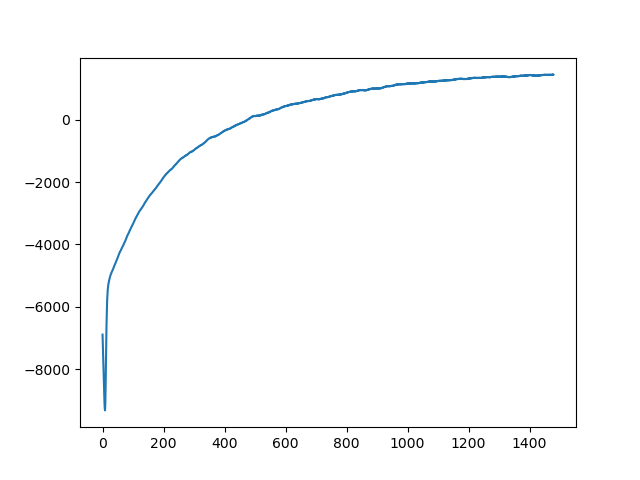

In [170]:
%matplotlib notebook
plt.plot(samplePulse)
plt.show()

In [232]:
nPulses = len(df.T)
# nPulses = 250
testList = []
pulseIdx = 0

#Dataframe with individual pulses
dfPulses = pd.DataFrame(columns = [0])

for i in range(nPulses):
    testList.append([])
    thisTrace = df[df.columns[i]]
    peaksList = pkdetect(thisTrace, 10, 10)
    individualPulses = isolatePulses(thisTrace, peaksList, PMT_PULSE_LENGTH, SAMPLES_BEFORE_PEAK)[1:]
    print("Processing trace " + str(i+1) + "/" + str(nPulses))
    for j in individualPulses:
#         print("j: " + str(j))
        filteredPulse = filterSinglePulse(j[0], firCoefsCo60)
        dfPulses[pulseIdx] = filteredPulse
        pulseIdx += 1

Processing trace 1/4235
Processing trace 2/4235
Processing trace 3/4235
Processing trace 4/4235
Processing trace 5/4235
Processing trace 6/4235
Processing trace 7/4235
Processing trace 8/4235
Processing trace 9/4235
Processing trace 10/4235
Processing trace 11/4235
Processing trace 12/4235
Processing trace 13/4235
Processing trace 14/4235
Processing trace 15/4235
Processing trace 16/4235
Processing trace 17/4235
Processing trace 18/4235
Processing trace 19/4235
Processing trace 20/4235
Processing trace 21/4235
Processing trace 22/4235
Processing trace 23/4235
Processing trace 24/4235
Processing trace 25/4235
Processing trace 26/4235
Processing trace 27/4235
Processing trace 28/4235
Processing trace 29/4235
Processing trace 30/4235
Processing trace 31/4235
Processing trace 32/4235
Processing trace 33/4235
Processing trace 34/4235
Processing trace 35/4235
Processing trace 36/4235
Processing trace 37/4235
Processing trace 38/4235
Processing trace 39/4235
Processing trace 40/4235
Processin

Processing trace 321/4235
Processing trace 322/4235
Processing trace 323/4235
Processing trace 324/4235
Processing trace 325/4235
Processing trace 326/4235
Processing trace 327/4235
Processing trace 328/4235
Processing trace 329/4235
Processing trace 330/4235
Processing trace 331/4235
Processing trace 332/4235
Processing trace 333/4235
Processing trace 334/4235
Processing trace 335/4235
Processing trace 336/4235
Processing trace 337/4235
Processing trace 338/4235
Processing trace 339/4235
Processing trace 340/4235
Processing trace 341/4235
Processing trace 342/4235
Processing trace 343/4235
Processing trace 344/4235
Processing trace 345/4235
Processing trace 346/4235
Processing trace 347/4235
Processing trace 348/4235
Processing trace 349/4235
Processing trace 350/4235
Processing trace 351/4235
Processing trace 352/4235
Processing trace 353/4235
Processing trace 354/4235
Processing trace 355/4235
Processing trace 356/4235
Processing trace 357/4235
Processing trace 358/4235
Processing t

Processing trace 637/4235
Processing trace 638/4235
Processing trace 639/4235
Processing trace 640/4235
Processing trace 641/4235
Processing trace 642/4235
Processing trace 643/4235
Processing trace 644/4235
Processing trace 645/4235
Processing trace 646/4235
Processing trace 647/4235
Processing trace 648/4235
Processing trace 649/4235
Processing trace 650/4235
Processing trace 651/4235
Processing trace 652/4235
Processing trace 653/4235
Processing trace 654/4235
Processing trace 655/4235
Processing trace 656/4235
Processing trace 657/4235
Processing trace 658/4235
Processing trace 659/4235
Processing trace 660/4235
Processing trace 661/4235
Processing trace 662/4235
Processing trace 663/4235
Processing trace 664/4235
Processing trace 665/4235
Processing trace 666/4235
Processing trace 667/4235
Processing trace 668/4235
Processing trace 669/4235
Processing trace 670/4235
Processing trace 671/4235
Processing trace 672/4235
Processing trace 673/4235
Processing trace 674/4235
Processing t

Processing trace 953/4235
Processing trace 954/4235
Processing trace 955/4235
Processing trace 956/4235
Processing trace 957/4235
Processing trace 958/4235
Processing trace 959/4235
Processing trace 960/4235
Processing trace 961/4235
Processing trace 962/4235
Processing trace 963/4235
Processing trace 964/4235
Processing trace 965/4235
Processing trace 966/4235
Processing trace 967/4235
Processing trace 968/4235
Processing trace 969/4235
Processing trace 970/4235
Processing trace 971/4235
Processing trace 972/4235
Processing trace 973/4235
Processing trace 974/4235
Processing trace 975/4235
Processing trace 976/4235
Processing trace 977/4235
Processing trace 978/4235
Processing trace 979/4235
Processing trace 980/4235
Processing trace 981/4235
Processing trace 982/4235
Processing trace 983/4235
Processing trace 984/4235
Processing trace 985/4235
Processing trace 986/4235
Processing trace 987/4235
Processing trace 988/4235
Processing trace 989/4235
Processing trace 990/4235
Processing t

Processing trace 1259/4235
Processing trace 1260/4235
Processing trace 1261/4235
Processing trace 1262/4235
Processing trace 1263/4235
Processing trace 1264/4235
Processing trace 1265/4235
Processing trace 1266/4235
Processing trace 1267/4235
Processing trace 1268/4235
Processing trace 1269/4235
Processing trace 1270/4235
Processing trace 1271/4235
Processing trace 1272/4235
Processing trace 1273/4235
Processing trace 1274/4235
Processing trace 1275/4235
Processing trace 1276/4235
Processing trace 1277/4235
Processing trace 1278/4235
Processing trace 1279/4235
Processing trace 1280/4235
Processing trace 1281/4235
Processing trace 1282/4235
Processing trace 1283/4235
Processing trace 1284/4235
Processing trace 1285/4235
Processing trace 1286/4235
Processing trace 1287/4235
Processing trace 1288/4235
Processing trace 1289/4235
Processing trace 1290/4235
Processing trace 1291/4235
Processing trace 1292/4235
Processing trace 1293/4235
Processing trace 1294/4235
Processing trace 1295/4235
P

Processing trace 1563/4235
Processing trace 1564/4235
Processing trace 1565/4235
Processing trace 1566/4235
Processing trace 1567/4235
Processing trace 1568/4235
Processing trace 1569/4235
Processing trace 1570/4235
Processing trace 1571/4235
Processing trace 1572/4235
Processing trace 1573/4235
Processing trace 1574/4235
Processing trace 1575/4235
Processing trace 1576/4235
Processing trace 1577/4235
Processing trace 1578/4235
Processing trace 1579/4235
Processing trace 1580/4235
Processing trace 1581/4235
Processing trace 1582/4235
Processing trace 1583/4235
Processing trace 1584/4235
Processing trace 1585/4235
Processing trace 1586/4235
Processing trace 1587/4235
Processing trace 1588/4235
Processing trace 1589/4235
Processing trace 1590/4235
Processing trace 1591/4235
Processing trace 1592/4235
Processing trace 1593/4235
Processing trace 1594/4235
Processing trace 1595/4235
Processing trace 1596/4235
Processing trace 1597/4235
Processing trace 1598/4235
Processing trace 1599/4235
P

Processing trace 1867/4235
Processing trace 1868/4235
Processing trace 1869/4235
Processing trace 1870/4235
Processing trace 1871/4235
Processing trace 1872/4235
Processing trace 1873/4235
Processing trace 1874/4235
Processing trace 1875/4235
Processing trace 1876/4235
Processing trace 1877/4235
Processing trace 1878/4235
Processing trace 1879/4235
Processing trace 1880/4235
Processing trace 1881/4235
Processing trace 1882/4235
Processing trace 1883/4235
Processing trace 1884/4235
Processing trace 1885/4235
Processing trace 1886/4235
Processing trace 1887/4235
Processing trace 1888/4235
Processing trace 1889/4235
Processing trace 1890/4235
Processing trace 1891/4235
Processing trace 1892/4235
Processing trace 1893/4235
Processing trace 1894/4235
Processing trace 1895/4235
Processing trace 1896/4235
Processing trace 1897/4235
Processing trace 1898/4235
Processing trace 1899/4235
Processing trace 1900/4235
Processing trace 1901/4235
Processing trace 1902/4235
Processing trace 1903/4235
P

Processing trace 2171/4235
Processing trace 2172/4235
Processing trace 2173/4235
Processing trace 2174/4235
Processing trace 2175/4235
Processing trace 2176/4235
Processing trace 2177/4235
Processing trace 2178/4235
Processing trace 2179/4235
Processing trace 2180/4235
Processing trace 2181/4235
Processing trace 2182/4235
Processing trace 2183/4235
Processing trace 2184/4235
Processing trace 2185/4235
Processing trace 2186/4235
Processing trace 2187/4235
Processing trace 2188/4235
Processing trace 2189/4235
Processing trace 2190/4235
Processing trace 2191/4235
Processing trace 2192/4235
Processing trace 2193/4235
Processing trace 2194/4235
Processing trace 2195/4235
Processing trace 2196/4235
Processing trace 2197/4235
Processing trace 2198/4235
Processing trace 2199/4235
Processing trace 2200/4235
Processing trace 2201/4235
Processing trace 2202/4235
Processing trace 2203/4235
Processing trace 2204/4235
Processing trace 2205/4235
Processing trace 2206/4235
Processing trace 2207/4235
P

Processing trace 2475/4235
Processing trace 2476/4235
Processing trace 2477/4235
Processing trace 2478/4235
Processing trace 2479/4235
Processing trace 2480/4235
Processing trace 2481/4235
Processing trace 2482/4235
Processing trace 2483/4235
Processing trace 2484/4235
Processing trace 2485/4235
Processing trace 2486/4235
Processing trace 2487/4235
Processing trace 2488/4235
Processing trace 2489/4235
Processing trace 2490/4235
Processing trace 2491/4235
Processing trace 2492/4235
Processing trace 2493/4235
Processing trace 2494/4235
Processing trace 2495/4235
Processing trace 2496/4235
Processing trace 2497/4235
Processing trace 2498/4235
Processing trace 2499/4235
Processing trace 2500/4235
Processing trace 2501/4235
Processing trace 2502/4235
Processing trace 2503/4235
Processing trace 2504/4235
Processing trace 2505/4235
Processing trace 2506/4235
Processing trace 2507/4235
Processing trace 2508/4235
Processing trace 2509/4235
Processing trace 2510/4235
Processing trace 2511/4235
P

Processing trace 2779/4235
Processing trace 2780/4235
Processing trace 2781/4235
Processing trace 2782/4235
Processing trace 2783/4235
Processing trace 2784/4235
Processing trace 2785/4235
Processing trace 2786/4235
Processing trace 2787/4235
Processing trace 2788/4235
Processing trace 2789/4235
Processing trace 2790/4235
Processing trace 2791/4235
Processing trace 2792/4235
Processing trace 2793/4235
Processing trace 2794/4235
Processing trace 2795/4235
Processing trace 2796/4235
Processing trace 2797/4235
Processing trace 2798/4235
Processing trace 2799/4235
Processing trace 2800/4235
Processing trace 2801/4235
Processing trace 2802/4235
Processing trace 2803/4235
Processing trace 2804/4235
Processing trace 2805/4235
Processing trace 2806/4235
Processing trace 2807/4235
Processing trace 2808/4235
Processing trace 2809/4235
Processing trace 2810/4235
Processing trace 2811/4235
Processing trace 2812/4235
Processing trace 2813/4235
Processing trace 2814/4235
Processing trace 2815/4235
P

Processing trace 3083/4235
Processing trace 3084/4235
Processing trace 3085/4235
Processing trace 3086/4235
Processing trace 3087/4235
Processing trace 3088/4235
Processing trace 3089/4235
Processing trace 3090/4235
Processing trace 3091/4235
Processing trace 3092/4235
Processing trace 3093/4235
Processing trace 3094/4235
Processing trace 3095/4235
Processing trace 3096/4235
Processing trace 3097/4235
Processing trace 3098/4235
Processing trace 3099/4235
Processing trace 3100/4235
Processing trace 3101/4235
Processing trace 3102/4235
Processing trace 3103/4235
Processing trace 3104/4235
Processing trace 3105/4235
Processing trace 3106/4235
Processing trace 3107/4235
Processing trace 3108/4235
Processing trace 3109/4235
Processing trace 3110/4235
Processing trace 3111/4235
Processing trace 3112/4235
Processing trace 3113/4235
Processing trace 3114/4235
Processing trace 3115/4235
Processing trace 3116/4235
Processing trace 3117/4235
Processing trace 3118/4235
Processing trace 3119/4235
P

Processing trace 3387/4235
Processing trace 3388/4235
Processing trace 3389/4235
Processing trace 3390/4235
Processing trace 3391/4235
Processing trace 3392/4235
Processing trace 3393/4235
Processing trace 3394/4235
Processing trace 3395/4235
Processing trace 3396/4235
Processing trace 3397/4235
Processing trace 3398/4235
Processing trace 3399/4235
Processing trace 3400/4235
Processing trace 3401/4235
Processing trace 3402/4235
Processing trace 3403/4235
Processing trace 3404/4235
Processing trace 3405/4235
Processing trace 3406/4235
Processing trace 3407/4235
Processing trace 3408/4235
Processing trace 3409/4235
Processing trace 3410/4235
Processing trace 3411/4235
Processing trace 3412/4235
Processing trace 3413/4235
Processing trace 3414/4235
Processing trace 3415/4235
Processing trace 3416/4235
Processing trace 3417/4235
Processing trace 3418/4235
Processing trace 3419/4235
Processing trace 3420/4235
Processing trace 3421/4235
Processing trace 3422/4235
Processing trace 3423/4235
P

Processing trace 3691/4235
Processing trace 3692/4235
Processing trace 3693/4235
Processing trace 3694/4235
Processing trace 3695/4235
Processing trace 3696/4235
Processing trace 3697/4235
Processing trace 3698/4235
Processing trace 3699/4235
Processing trace 3700/4235
Processing trace 3701/4235
Processing trace 3702/4235
Processing trace 3703/4235
Processing trace 3704/4235
Processing trace 3705/4235
Processing trace 3706/4235
Processing trace 3707/4235
Processing trace 3708/4235
Processing trace 3709/4235
Processing trace 3710/4235
Processing trace 3711/4235
Processing trace 3712/4235
Processing trace 3713/4235
Processing trace 3714/4235
Processing trace 3715/4235
Processing trace 3716/4235
Processing trace 3717/4235
Processing trace 3718/4235
Processing trace 3719/4235
Processing trace 3720/4235
Processing trace 3721/4235
Processing trace 3722/4235
Processing trace 3723/4235
Processing trace 3724/4235
Processing trace 3725/4235
Processing trace 3726/4235
Processing trace 3727/4235
P

Processing trace 3995/4235
Processing trace 3996/4235
Processing trace 3997/4235
Processing trace 3998/4235
Processing trace 3999/4235
Processing trace 4000/4235
Processing trace 4001/4235
Processing trace 4002/4235
Processing trace 4003/4235
Processing trace 4004/4235
Processing trace 4005/4235
Processing trace 4006/4235
Processing trace 4007/4235
Processing trace 4008/4235
Processing trace 4009/4235
Processing trace 4010/4235
Processing trace 4011/4235
Processing trace 4012/4235
Processing trace 4013/4235
Processing trace 4014/4235
Processing trace 4015/4235
Processing trace 4016/4235
Processing trace 4017/4235
Processing trace 4018/4235
Processing trace 4019/4235
Processing trace 4020/4235
Processing trace 4021/4235
Processing trace 4022/4235
Processing trace 4023/4235
Processing trace 4024/4235
Processing trace 4025/4235
Processing trace 4026/4235
Processing trace 4027/4235
Processing trace 4028/4235
Processing trace 4029/4235
Processing trace 4030/4235
Processing trace 4031/4235
P

In [233]:
dfPulses

0          1          2          3          4          5      \
0     76.604831  82.076604  80.252680  79.036730  83.292554  81.468630   
1     47.549322  50.945703  49.813576  49.058825  51.700454  50.568327   
2     75.872649  81.292124  79.485632  78.281305  82.496452  80.689960   
3     47.091467  50.455143  49.333918  48.586434  51.202626  50.081401   
4     73.426403  78.671146  76.922898  75.757400  79.836644  78.088396   
...         ...        ...        ...        ...        ...        ...   
1495  50.880456  54.514775  53.303335  52.495709  55.322401  54.110961   
1496  78.490920  84.097414  82.228583  80.982695  85.343302  83.474471   
1497  50.808643  54.437832  53.228102  52.421616  55.244318  54.034588   
1498  78.251284  83.840662  81.977536  80.735452  85.082745  83.219620   
1499  50.034385  53.608269  52.416974  51.622778  54.402466  53.211171   

          6          7          8          9      ...      24194      24195  \
0     78.428755  83.292554  83.292554  66.877233  ...  80.252680  80.252680   
1     48.681449  51.700454  51.700454  41.511313  ...  49.813576  49.813576   
2     77.679141  82.496452  82.496452  66.238027  ...  79.485632  79.485632   
3     48.212692  51.202626  51.202626  41.111598  ...  49.333918  49.333918   
4     75.174650  79.836644  79.836644  64.102415  ...  76.922898  76.922898   
...         ...        ...        ...        ...  ...        ...        ...   
1495  52.091896  55.322401  55.322401  44.419446  ...  53.303335  53.303335   
1496  80.359752  85.343302  85.343302  68.523819  ...  82.228583  82.228583   
1497  52.018372  55.244318  55.244318  44.356752  ...  53.228102  53.228102   
1498  80.114410  85.082745  85.082745  68.314613  ...  81.977536  81.977536   
1499  51.225679  54.402466  54.402466  43.680812  ...  52.416974  52.416974   

          24196      24197      24198      24199      24200      24201  \
0     77.820781  76.604831  72.349007  80.860655  71.741032  72.349007   
1     48.304074  47.549322  44.907693  50.190951  44.530318  44.907693   
2     77.076977  75.872649  71.657502  80.087796  71.055338  71.657502   
3     47.838950  47.091467  44.475274  49.707659  44.101532  44.475274   
4     74.591901  73.426403  69.347158  77.505647  68.764409  69.347158   
...         ...        ...        ...        ...        ...        ...   
1495  51.688083  50.880456  48.053764  53.707148  47.649951  48.053764   
1496  79.736808  78.490920  74.130314  82.851527  73.507370  74.130314   
1497  51.615129  50.808643  47.985940  53.631345  47.582697  47.985940   
1498  79.493368  78.251284  73.903991  82.598578  73.282949  73.903991   
1499  50.828581  50.034385  47.254697  52.814073  46.857598  47.254697   

          24202      24203  
0     83.292554  72.956982  
1     51.700454  45.285069  
2     82.496452  72.259666  
3     51.202626  44.849016  
4     79.836644  69.929907  
...         ...        ...  
1495  55.322401  48.457577  
1496  85.343302  74.753257  
1497  55.244318  48.389184  
1498  85.082745  74.525033  
1499  54.402466  47.651795  

[1500 rows x 24204 columns]

In [234]:
dfPulses.to_csv("../PeakDetection_Co60_IndividualPulses_Filtered.csv")

<IPython.core.display.Javascript object>


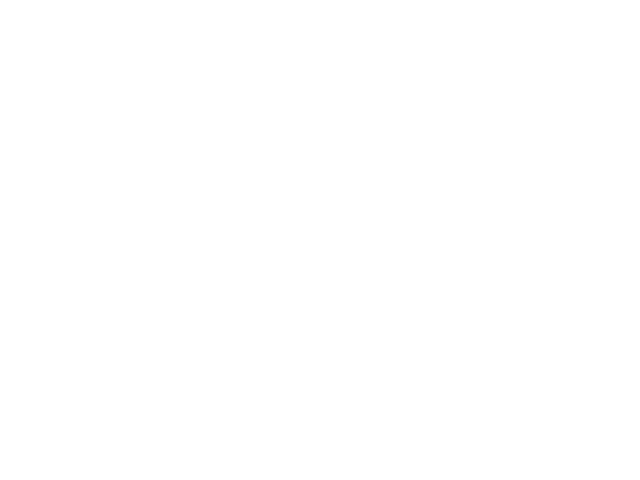

In [235]:
%matplotlib notebook

nPlots = 1
startIndex = 4


ax = plt.plot(dfPulses[dfPulses.columns[startIndex]])

for i in range(nPlots - 1):
    plt.plot(dfPulses[dfPulses.columns[startIndex + 1 + i]])
    plt.plot()

In [236]:
def singlePulseToArea(singlePulse):
    newPulse = max(singlePulse) - singlePulse
    return sum(newPulse)

In [237]:
dfAreas = pd.DataFrame(columns = ["Co60"])

In [238]:
dfAreas["Co60"] = dfPulses.apply(singlePulseToArea, axis = 0)

In [239]:
dfAreas

Co60
0      117936.792536
1      126360.849146
2      123552.830276
3      121680.817696
4      128232.861726
...              ...
24199  124488.836566
24200  110448.742216
24201  111384.748506
24202  128232.861726
24203  112320.754796

[24204 rows x 1 columns]

In [240]:
dfAreas.to_csv("../PeakDetection_Co60_Areas_Filtered.csv")

<IPython.core.display.Javascript object>


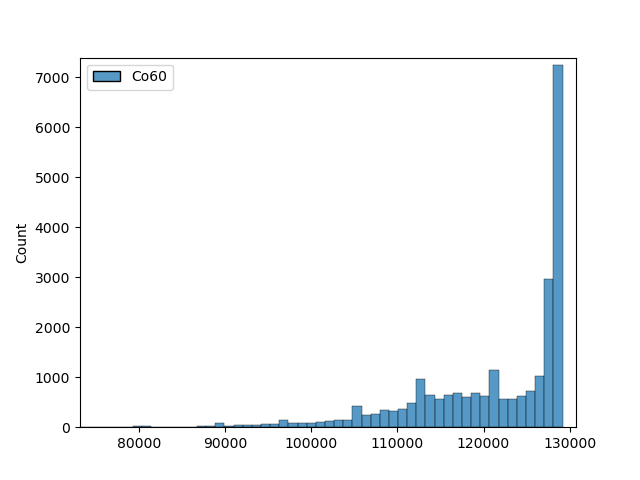

In [243]:
%matplotlib notebook
sns.histplot(dfAreas, bins = 120)
plt.show()

<IPython.core.display.Javascript object>


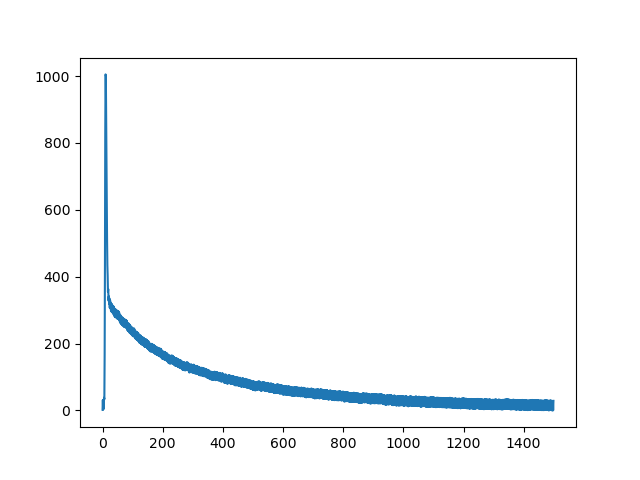

In [211]:
%matplotlib notebook
dfMax = max(dfPulses[dfPulses.columns[0]])
dfNew = dfMax - dfPulses[dfPulses.columns[0]]
plt.plot(dfNew)
plt.show()